### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
import pandas as pd
import tensorflow as tf
import os
import keras

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
status = application_df.IS_SUCCESSFUL.value_counts()
status

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [5]:
askamounts = application_df.ASK_AMT.value_counts()
askamounts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

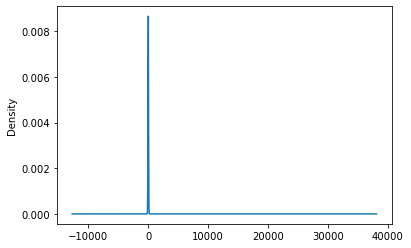

In [6]:
askamounts.plot.density()

In [7]:
application_df = application_df[application_df.ASK_AMT != 5000]
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
...,...,...,...,...,...,...,...,...,...,...
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,56261,1
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34287,T3,Independent,C1200,Preservation,Trust,1,25000-99999,N,6713,1
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1


In [8]:
# Look at APPLICATION_TYPE value counts for binning
appcounts = application_df.APPLICATION_TYPE.value_counts()
appcounts

T3     7536
T6      369
T5      297
T4      233
T9      141
T7      109
T8       77
T19      71
T10      21
T12      14
T13      12
T2       10
T25       3
T14       3
T29       2
T15       2
T17       1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

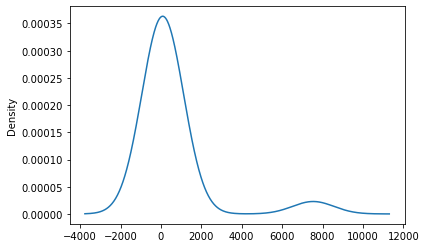

In [9]:
# Visualize the value counts of APPLICATION_TYPE
appcounts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(appcounts[appcounts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


T3       7536
Other    1365
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classcounts = application_df.CLASSIFICATION.value_counts()
classcounts

C1000    5126
C2000    1492
C1200     928
C3000     413
C2100     305
C7000     262
C4000      76
C1700      70
C2800      34
C2700      31
C1270      28
C1300      18
C7100      14
C7200      12
C1800      12
C1400      10
C1500      10
C5000      10
C8000       7
C7120       7
C1280       4
C2300       4
C1240       3
C8200       2
C7210       2
C2710       2
C4100       2
C2400       2
C1820       1
C1234       1
C5200       1
C6000       1
C1250       1
C3200       1
C1600       1
C2561       1
C1238       1
C0          1
C1230       1
C2170       1
C8210       1
C1245       1
C1900       1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

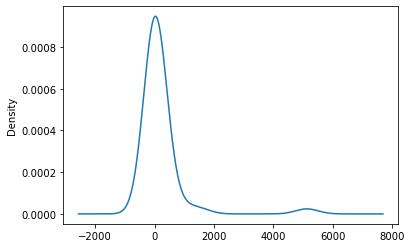

In [12]:
# Visualize the value counts of CLASSIFICATION
classcounts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classcounts[classcounts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C1000    5126
Other    3775
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          2
AFFILIATION               6
CLASSIFICATION            2
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_Other,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
applicatioin_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
1,T3,Independent,Other,Preservation,Co-operative,1,1-9999,N,108590,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,T3,CompanySponsored,Other,Preservation,Trust,1,10000-24999,N,6692,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,T3,Independent,Other,Preservation,Trust,1,10M-50M,N,7508025,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = pd.get_dummies(application_df.drop(['IS_SUCCESSFUL'],1))
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
len(X_train_scaled[0])

61

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 416
hidden_nodes_layer2 = 288
hidden_notes_layer3 = 160

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               25792     
                                                                 
 dense_1 (Dense)             (None, 288)               120096    
                                                                 
 dense_2 (Dense)             (None, 288)               83232     
                                                                 
 dense_3 (Dense)             (None, 1)                 289       
                                                                 
Total params: 229,409
Trainable params: 229,409
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=  "checkpoints/weights.{epoch:02d}.hdf5",
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100
54/54 [==============================] - 1s 3ms/step - loss: 0.6801 - accuracy: 0.6379
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6723
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6933
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7032
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.7044
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.7085
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7312
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7359
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7382
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7516
Epoch 11/

54/54 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8309
Epoch 84/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8327
Epoch 85/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8292
Epoch 86/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8239
Epoch 87/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8292
Epoch 88/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8297
Epoch 89/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8292
Epoch 90/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8297
Epoch 91/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8251
Epoch 92/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8344
Epoch 93/100


In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18/18 - 0s - loss: 1.0623 - accuracy: 0.6451 - 43ms/epoch - 2ms/step
Loss: 1.0622674226760864, Accuracy: 0.6451048851013184


In [25]:
nn.save("AlphabetSoupCharity_Optimization.h5")

# Attempts

## Removed Anything that didn't have an amount of 5000 (since most of the data was 5000 ask amount)

## Added another hidden layer and changed the activation.

## Tried to optimize the parameter. Downloaded Keras Tuner and tried to run to optimize and change all of the paramters, but was unable to get the "accuracy" to be higher. Could not get Accuracy above 0.64 (but when the model runs it gets to 0.83). Increasing the Epochs doesn't affect the model_accuracy for some reason. 

# Checked Dendrogram Accuracy and Optimize Below

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = pd.get_dummies(application_df.drop(['IS_SUCCESSFUL'],1))
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\jomli\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=1000, random_state=71)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.636
